In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [210]:
df=pd.read_csv('movie_review.csv')

In [211]:
df

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos
...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,neg
64716,9,cv999,14636,21,like too many of the skits on the current inca...,neg
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",neg
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",neg


In [212]:
reviews=df[['text','tag']]

In [213]:
reviews

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [214]:
reviews.isna().sum()

text    0
tag     0
dtype: int64

In [215]:
reviews.duplicated().sum()

961

In [216]:
reviews=reviews.drop_duplicates()

In [217]:
reviews.shape

(63759, 2)

<BarContainer object of 2 artists>

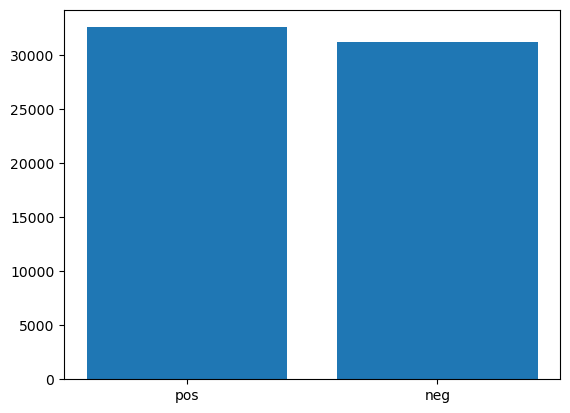

In [218]:
plt.bar(x=reviews['tag'].unique(),height=reviews['tag'].value_counts(),)

In [219]:
reviews['tag'].value_counts()

tag
pos    32584
neg    31175
Name: count, dtype: int64

In [220]:
df1=pd.DataFrame()

In [221]:
df1['word_count']=reviews['text'].apply(lambda x: len(str(x).split()))

In [222]:
df1

,word_count
0,52
1,36
2,27
3,30
4,13
...,...
64715,14
64716,43
64717,35
64718,11


In [223]:
df1['unique_word_count']=reviews['text'].apply(lambda x: len(set(str(x).split())))

In [224]:
df1

,word_count,unique_word_count
0,52,41
1,36,32
2,27,25
3,30,29
4,13,13
...,...,...
64715,14,14
64716,43,34
64717,35,28
64718,11,8


In [225]:
from wordcloud import STOPWORDS

In [226]:
df1['stop_words_count']=reviews['text'].apply(lambda x: len([a for a in str(x).lower().split() if a in STOPWORDS]))

In [227]:
df1

,word_count,unique_word_count,stop_words_count
0,52,41,16
1,36,32,14
2,27,25,11
3,30,29,11
4,13,13,7
...,...,...,...
64715,14,14,7
64716,43,34,20
64717,35,28,16
64718,11,8,3


In [228]:
df1['url_counts']=reviews['text'].apply(lambda x : len([a for a in str(x).lower().split() if 'http' in a or 'https' in a or 'www' in a or '.com' in a]))

In [229]:
df1

,word_count,unique_word_count,stop_words_count,url_counts
0,52,41,16,0
1,36,32,14,0
2,27,25,11,0
3,30,29,11,0
4,13,13,7,0
...,...,...,...,...
64715,14,14,7,0
64716,43,34,20,0
64717,35,28,16,0
64718,11,8,3,0


In [230]:
df1['word_length']=reviews['text'].apply(lambda x: np.mean([len(a) for a in str(x).lower().split()]))

In [231]:
df1['tag']=reviews['tag']

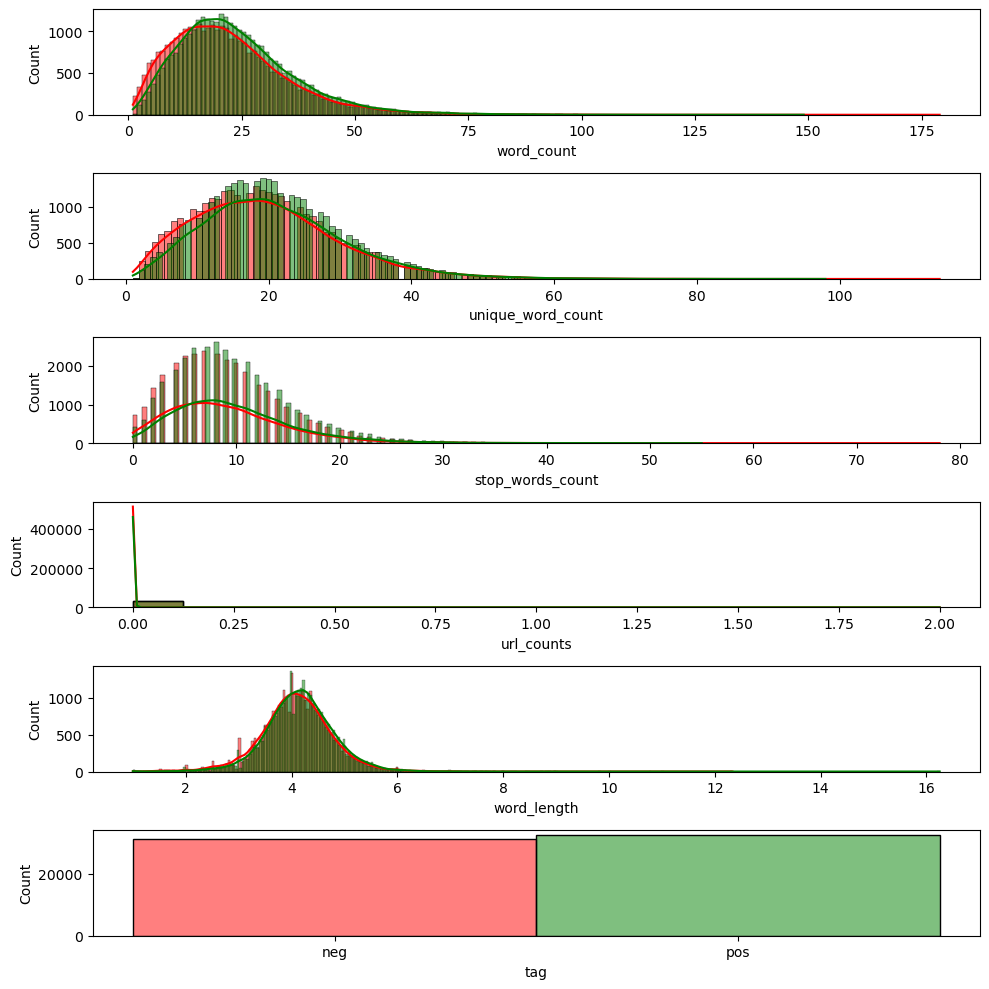

In [232]:
fig, axes = plt.subplots(nrows=len(df1.columns),figsize=(10,10),dpi=100)
pos=reviews['tag']=='pos'
for i, feature in enumerate(df1.columns):
    sns.histplot(df1.loc[~pos, feature],label='Negative',ax=axes[i],color='red',kde=True)
    sns.histplot(df1.loc[pos, feature],label='Positive',ax=axes[i],color='green',kde=True)

plt.tight_layout()
plt.show()

In [233]:
df1

,word_count,unique_word_count,stop_words_count,url_counts,word_length,tag
0,52,41,16,0,4.115385,pos
1,36,32,14,0,3.805556,pos
2,27,25,11,0,4.592593,pos
3,30,29,11,0,3.633333,pos
4,13,13,7,0,4.000000,pos
...,...,...,...,...,...,...
64715,14,14,7,0,4.928571,neg
64716,43,34,20,0,4.627907,neg
64717,35,28,16,0,3.342857,neg
64718,11,8,3,0,3.454545,neg


In [234]:
import tensorflow as tf 
import spacy
from bs4 import BeautifulSoup
from textblob import TextBlob
import emoji
from nltk.stem import WordNetLemmatizer
import string
import re
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import catboost
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [235]:
nlp = spacy.load("en_core_web_sm")

In [236]:
doc=pd.DataFrame()

In [237]:
doc['text']=reviews['text'].apply(lambda x : nlp(x))

In [238]:
doc

,text
0,"(films, adapted, from, comic, books, have, had..."
1,"(for, starters, ,, it, was, created, by, alan,..."
2,"(to, say, moore, and, campbell, thoroughly, re..."
3,"(the, book, (, or, "", graphic, novel, ,, "", if..."
4,"(in, other, words, ,, do, n't, dismiss, this, ..."
...,...
64715,"(that, lack, of, inspiration, can, be, traced,..."
64716,"(like, too, many, of, the, skits, on, the, cur..."
64717,"(after, watching, one, of, the, "", roxbury, "",..."
64718,"(bump, unsuspecting, women, ,, and, ., ., ., t..."


In [239]:
def removing_html_tag_url(doc):
    if '<' in doc.text and '>' in doc.text:
        # Remove URLs
        text = re.sub(r'http\S+|www.\S+', '', doc.text)
        # Remove specific Twitter URLs
        text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
        # Use BeautifulSoup to remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()
    else:
        # If it doesn't look like HTML, you may need to handle it differently
        text = doc.text
    return nlp.make_doc(text)

In [240]:
def remove_emojies(doc):
    text = ' '.join([emoji.demojize(token.text) for token in doc])
    return nlp.make_doc(text)

In [241]:
def remove_punctuations(doc):
    text = ''.join([char for char in doc.text if char not in string.punctuation])
    return nlp.make_doc(text)

In [242]:
def negations(doc):
    tweet=doc.text
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)
    return nlp.make_doc(tweet)

In [243]:
def special_characters(doc):
    pattern = r'[^A-Za-z0-9\s]'
    text = re.sub(pattern, '', doc.text)
    return nlp.make_doc(text)

In [244]:
def lowering(doc):
    text = ' '.join([token.text.lower() for token in doc])
    return nlp.make_doc(text)

In [245]:
def removing_stop_words(doc):
    return nlp.make_doc(' '.join([token.text for token in doc if not token.is_stop]))

In [246]:
def pipeline(doc):
    doc=removing_html_tag_url(doc)
    doc=remove_emojies(doc)
    doc=remove_punctuations(doc)
    doc=negations(doc)
    doc=special_characters(doc)
    doc=lowering(doc)
    doc=removing_stop_words(doc)
    return doc

In [247]:
from tqdm import tqdm
tqdm.pandas()

In [248]:
cleaned_text=pd.DataFrame()

In [249]:
cleaned_text['text']=doc['text'].progress_apply(pipeline)

100%|██████████████████████████████████████████████████████████████████████████| 63759/63759 [00:37<00:00, 1707.77it/s]


In [250]:
def lemmatization(doc):
    lem = WordNetLemmatizer()
    text = ' '.join([lem.lemmatize(token.text) for token in doc])
    return nlp.make_doc(text)

In [251]:
cleaned_text['text']=doc['text'].progress_apply(lemmatization)

100%|██████████████████████████████████████████████████████████████████████████| 63759/63759 [00:11<00:00, 5476.70it/s]


In [252]:
cleaned_text

,text
0,"(film, adapted, from, comic, book, have, had, ..."
1,"(for, starter, ,, it, wa, created, by, alan, m..."
2,"(to, say, moore, and, campbell, thoroughly, re..."
3,"(the, book, (, or, "", graphic, novel, ,, "", if..."
4,"(in, other, word, ,, do, n't, dismiss, this, f..."
...,...
64715,"(that, lack, of, inspiration, can, be, traced,..."
64716,"(like, too, many, of, the, skit, on, the, curr..."
64717,"(after, watching, one, of, the, "", roxbury, "",..."
64718,"(bump, unsuspecting, woman, ,, and, ., ., ., t..."


In [253]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [254]:
bow=CountVectorizer()
tf_idf=TfidfVectorizer()

In [255]:
train=cleaned_text['text'].apply(lambda x: ' '.join([token.text for token in x]))

In [256]:
train

0        film adapted from comic book have had plenty o...
1        for starter , it wa created by alan moore ( an...
2        to say moore and campbell thoroughly researche...
3        the book ( or " graphic novel , " if you will ...
4        in other word , do n't dismiss this film becau...
                               ...                        
64715    that lack of inspiration can be traced back to...
64716    like too many of the skit on the current incar...
64717    after watching one of the " roxbury " skit on ...
64718    bump unsuspecting woman , and . . . that 's all .
64719    after watching _ a_night_at_the_roxbury _ , yo...
Name: text, Length: 63759, dtype: object

In [257]:
df_bow=bow.fit_transform(train)

In [258]:
df_tf=tf_idf.fit_transform(train)

In [259]:
bow_feature_names=bow.get_feature_names_out()
tf_idf_feature_names=tf_idf.get_feature_names_out()

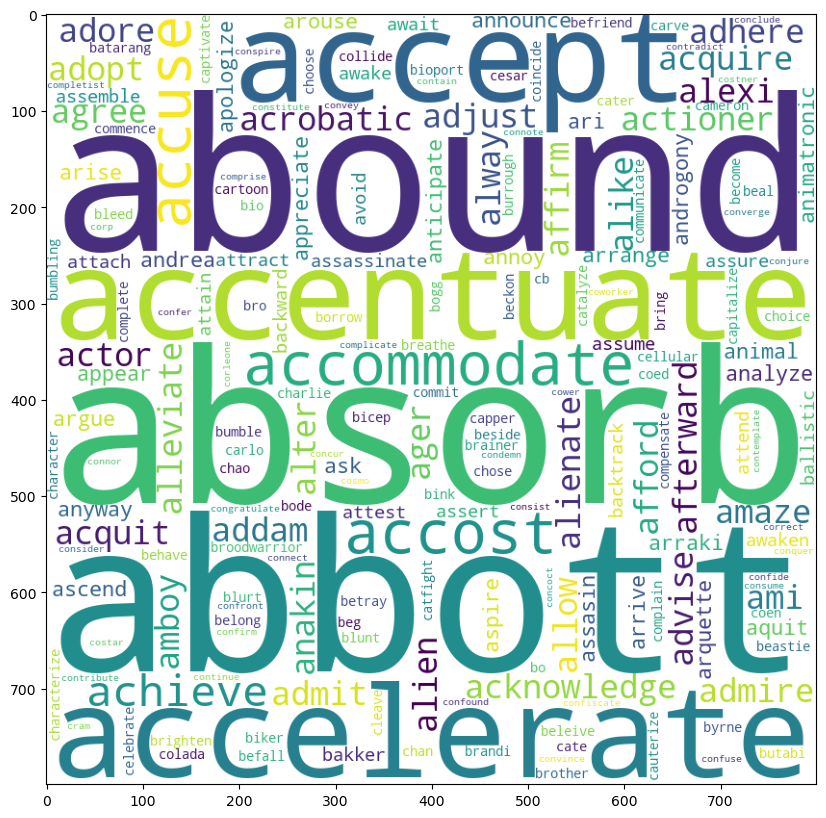

In [260]:
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wordcloud.generate(' '.join(bow_feature_names))
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud) 

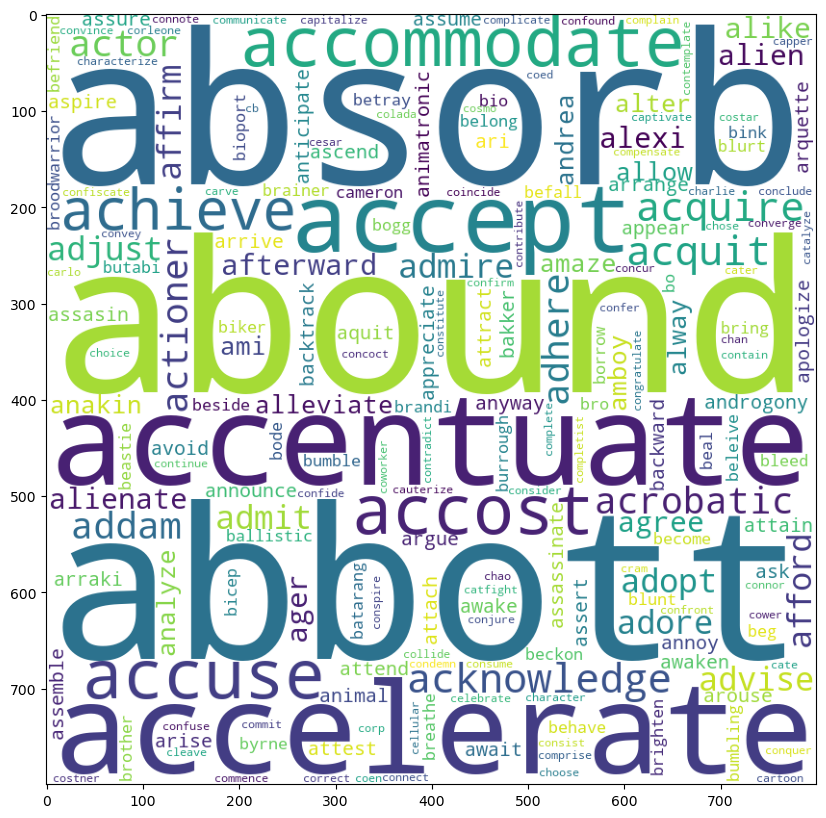

In [261]:
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wordcloud.generate(' '.join(tf_idf_feature_names))
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud) 

In [262]:
label_encoder=LabelEncoder()

In [263]:
y=label_encoder.fit_transform(reviews['tag'])

In [264]:
def model(x,y):
    df1=pd.DataFrame()
    pred=pd.DataFrame()
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,shuffle=True)
    algorithms={
    'dt': DecisionTreeClassifier(),
    'lg': LogisticRegression(n_jobs=-1,warm_start=True,max_iter=1000,verbose=2),
    'rf': RandomForestClassifier(verbose=2,n_jobs=-1,warm_start=True),
    'ada': AdaBoostClassifier(),
    'bg': BaggingClassifier(verbose=2,n_jobs=-1,warm_start=True),
    'xgboost': XGBClassifier(n_jobs=-1),
    'catboost':CatBoostClassifier(verbose=2)
    }
    for key, alg in algorithms.items():
        alg.fit(xtrain, ytrain)
        pred[key]= alg.predict(xtest)
        train_pred = alg.predict(xtrain)
        df1.loc[key, 'test'] = accuracy_score(ytest, pred[key])
        df1.loc[key, 'train'] = accuracy_score(ytrain, train_pred)
    return df1,pred,xtrain,xtest,ytrain,ytest

In [265]:
acc,pred,xtrain,xtest,ytrain,ytest=model(df_bow,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100building tree 17 of 100
building tree 18 of 100

building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.0s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   47.7s remaining:  1.9min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   51.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend Loky

Learning rate set to 0.052159
0:	learn: 0.6922939	total: 178ms	remaining: 2m 58s
2:	learn: 0.6906332	total: 440ms	remaining: 2m 26s
4:	learn: 0.6893010	total: 671ms	remaining: 2m 13s
6:	learn: 0.6880968	total: 897ms	remaining: 2m 7s
8:	learn: 0.6868920	total: 1.14s	remaining: 2m 5s
10:	learn: 0.6858909	total: 1.35s	remaining: 2m 1s
12:	learn: 0.6849776	total: 1.57s	remaining: 1m 59s
14:	learn: 0.6842211	total: 1.79s	remaining: 1m 57s
16:	learn: 0.6833524	total: 2.01s	remaining: 1m 56s
18:	learn: 0.6825325	total: 2.22s	remaining: 1m 54s
20:	learn: 0.6820240	total: 2.43s	remaining: 1m 53s
22:	learn: 0.6813959	total: 2.66s	remaining: 1m 53s
24:	learn: 0.6807861	total: 2.88s	remaining: 1m 52s
26:	learn: 0.6801497	total: 3.11s	remaining: 1m 52s
28:	learn: 0.6795440	total: 3.3s	remaining: 1m 50s
30:	learn: 0.6790204	total: 3.51s	remaining: 1m 49s
32:	learn: 0.6784670	total: 3.7s	remaining: 1m 48s
34:	learn: 0.6778658	total: 3.9s	remaining: 1m 47s
36:	learn: 0.6773769	total: 4.15s	remaining: 

In [266]:
acc

,test,train
dt,0.555834,0.997827
lg,0.685330,0.856848
rf,0.633940,0.997827
ada,0.583699,0.589411
bg,0.576955,0.979924
xgboost,0.630646,0.697811
catboost,0.652028,0.713966


In [267]:
acc1,pred1,xtrain1,xtest1,ytrain1,ytest1=model(df_tf,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s


building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   59.7s remaining:  2.3min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend Loky

Learning rate set to 0.052159
0:	learn: 0.6923582	total: 229ms	remaining: 3m 48s
2:	learn: 0.6908204	total: 722ms	remaining: 3m 59s
4:	learn: 0.6894348	total: 1.19s	remaining: 3m 56s
6:	learn: 0.6882239	total: 1.65s	remaining: 3m 54s
8:	learn: 0.6870212	total: 2.11s	remaining: 3m 52s
10:	learn: 0.6860520	total: 2.57s	remaining: 3m 51s
12:	learn: 0.6852074	total: 3.1s	remaining: 3m 55s
14:	learn: 0.6842673	total: 3.61s	remaining: 3m 57s
16:	learn: 0.6833629	total: 4.06s	remaining: 3m 54s
18:	learn: 0.6827304	total: 4.57s	remaining: 3m 55s
20:	learn: 0.6820402	total: 5.01s	remaining: 3m 53s
22:	learn: 0.6814654	total: 5.46s	remaining: 3m 51s
24:	learn: 0.6809175	total: 5.96s	remaining: 3m 52s
26:	learn: 0.6802769	total: 6.46s	remaining: 3m 52s
28:	learn: 0.6796279	total: 6.91s	remaining: 3m 51s
30:	learn: 0.6790404	total: 7.38s	remaining: 3m 50s
32:	learn: 0.6785064	total: 7.86s	remaining: 3m 50s
34:	learn: 0.6778760	total: 8.32s	remaining: 3m 49s
36:	learn: 0.6773078	total: 8.89s	remain

In [268]:
acc1

,test,train
dt,0.552802,0.997759
lg,0.681723,0.795770
rf,0.626987,0.997759
ada,0.582026,0.592794
bg,0.561690,0.981425
xgboost,0.627405,0.721203
catboost,0.649833,0.729739


In [269]:
from sklearn.metrics import roc_curve, auc

In [270]:
lg=LogisticRegression(n_jobs=-1,warm_start=True,max_iter=1000,verbose=2)

In [271]:
lg.fit(xtrain1,ytrain1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=1000, n_jobs=-1, verbose=2, warm_start=True)

In [272]:
yproba=lg.predict_proba(xtest)[:,1]

In [273]:
yproba

array([0.98934879, 0.98657627, 0.99993917, ..., 0.95177648, 0.99946462,
       0.9768628 ])

In [274]:
fpr,tpr,thresholds=roc_curve(ytest, yproba)
roc_auc=auc(fpr, tpr)

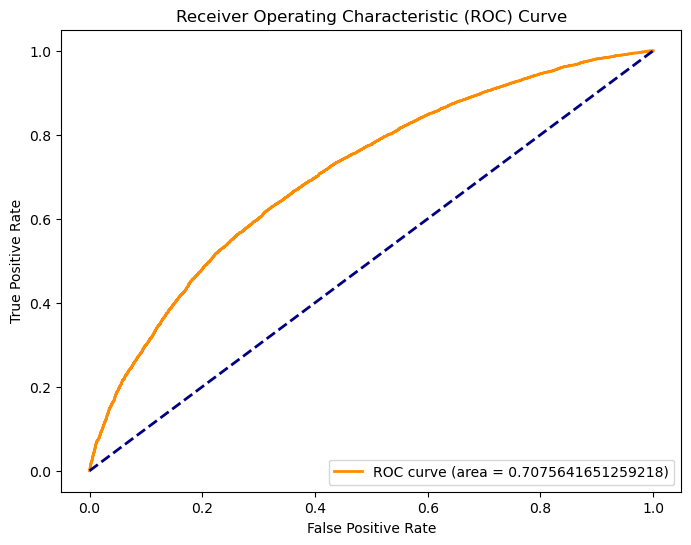

In [275]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()